<IPython.core.display.Javascript object>


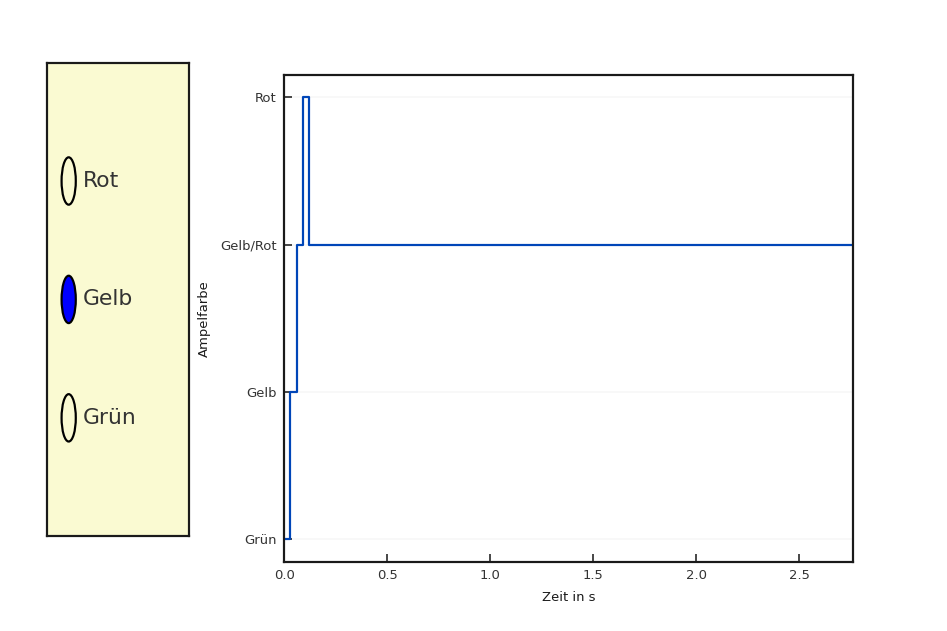

In [1]:
%matplotlib notebook
import matplotlib
import numpy
from matplotlib import pyplot
from matplotlib.widgets import RadioButtons
#import time

matplotlib.style.use('sv1_style.mplstyle')

current_light = "Rot" 
t = [0, 0.03, 0.06, 0.09] # Zeitvektor mit 
lights = ["Grün", "Gelb", "Gelb/Rot", "Rot"] # Anfangswerte um Plot in Ampelreihenfolge zu bringen
d_t = 0.03 # Zeit nach einem Durchlauf in s
cur_t = 0.09

# plots 

#Schaltet den interaktiven modus an was eine kontinuierliche Änderung der Grafik möglich macht, 
#andernfalls würde bei pyplot.show() erst weitergemacht werden, wenn die Grafik geschlossen wurde, 
#was es unmöglich macht sie zu ändern

matplotlib.pyplot.ion()

fig, ax = pyplot.subplots()
line, = ax.step(t, lights, where='post') # defines the steps of a step diagram
ax.grid(axis='x', color='0.8')
ax.set(xlabel='Zeit in s', ylabel='Ampelfarbe')
ax.set_xlim((0, 100))

fig.subplots_adjust(left=0.3)
rax = pyplot.axes([0.05, 0.15, 0.15, 0.75], facecolor='lightgoldenrodyellow')
radio = RadioButtons(rax, ('Rot', 'Gelb', 'Grün'))

def lights_change(label):
    '''
    Wählt richtige Ampelfarbe aus
    '''
    
    global current_light
    
    if(label=='Rot'):
        current_light="Rot"
    elif(label=='Gelb'):
        # nach grün ist die Ampel gelb/rot
        if(current_light=="Grün"):
            current_light="Gelb/Rot"
        # nach rot wird sie gelb
        elif(current_light=="Rot"):
            current_light="Gelb"
    elif(label=='Grün'):
        current_light="Grün"

# ruft "lights_change" auf wenn button gedrückt wurde
radio.on_clicked(lights_change)

pyplot.show()

In [2]:

# Schleife läuft bis Programm abbricht
while(True):
    cur_t += d_t
    # vektoren anhängen
    t = t + [cur_t]
    lights = lights + [current_light] 
    # daten updaten
    line.set_xdata(t)
    line.set_ydata(lights)
    # 30 ms warten
    pyplot.pause(d_t)
    ax.set(xlim=[0, cur_t])
    fig.canvas.draw()


KeyboardInterrupt: 